In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import promonet
import ppgs
import pysodic
from pathlib import Path
import torchaudio
import os
import IPython.display as ipd
import matplotlib.pyplot as plt

In [3]:
config_dir = promonet.ROOT_DIR / 'config' / 'ppgs-experiments'
ppgs_config_dir = config_dir / 'ppgs'
promonet_config_dir = config_dir / 'promonet'
model = 'w2v2fb-ppg'

In [4]:
def monophonize(audio_file):
    audio, sample_rate = torchaudio.load(audio_file)
    audio = audio.mean(dim=0, keepdim=True)
    torchaudio.save(audio_file, audio, sample_rate=sample_rate)

torch.Size([1, 261])


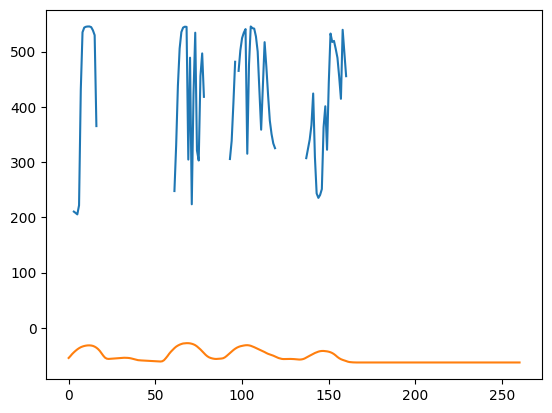

In [5]:
pitch, periodicity, loudness, voicing = pysodic.from_file('dog_bark.wav')
pitch[~voicing] = torch.nan
print(pitch.shape)
x = range(0, pitch.shape[-1])
plt.plot(x, pitch.squeeze(dim=0))
plt.plot(x, loudness.squeeze(dim=0))
plt.show()

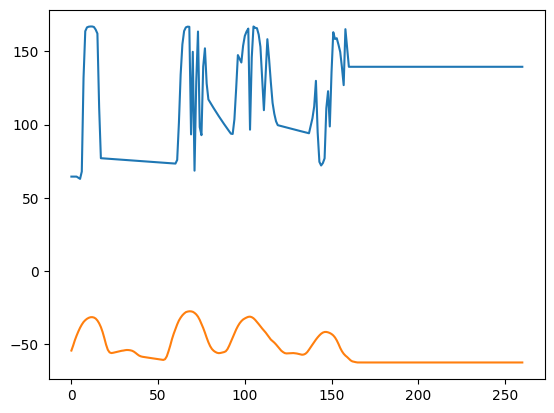

In [6]:
audio_file = Path('dog_bark.wav')
pitch, periodicity, loudness, voicing = pysodic.from_file('dog_bark.wav')
mean = pitch.mean()
target_mean = 120
pitch = (pitch/(mean/target_mean))
x = range(0, pitch.shape[-1])
plt.plot(x, pitch.squeeze(dim=0))
plt.plot(x, loudness.squeeze(dim=0))
plt.show()
torch.save(pitch, 'dog_bark-pitch.pt')

> /repos/ppgs/ppgs/evaluate/visualize.py(78)from_ppg_to_pixels()
     76     pixels = torch.nn.functional.pad(pixels, (0, 0, padding, padding)) #pad so playhead is centered
     77     import pdb; pdb.set_trace()
---> 78     pixels = pixels.unsqueeze(-1).repeat(1,1,3) #unsqueeze and convert form greyscale to rgb
     79     return pixels
     80 



ipdb>  c


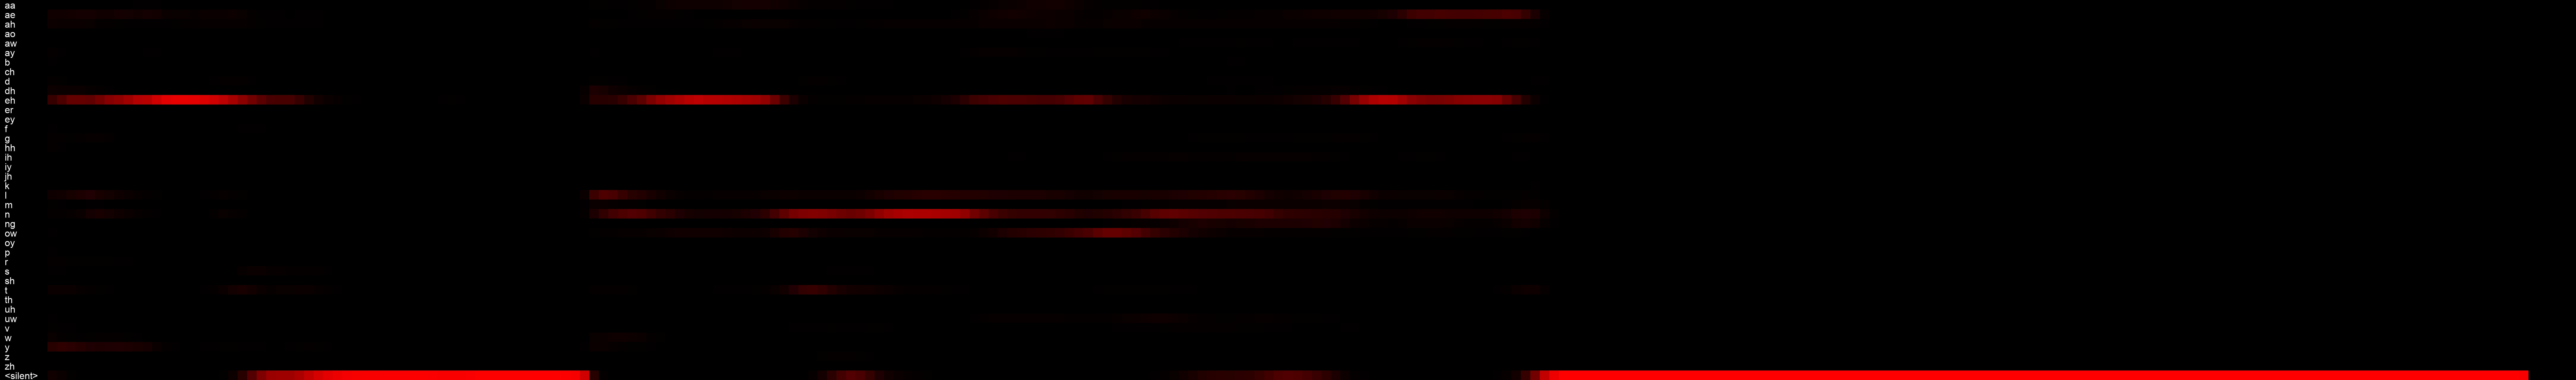

In [14]:
vis_dir = Path('visualizations')
with torch.autocast('cuda'):
    ppgs.evaluate.visualize.from_ppg_to_image_file(
        ppgs.from_file(audio_file, gpu=0).cpu(),
        audio_file,
        vis_dir / f'fig-{audio_file}.jpg',
        font_filename='arial.ttf',
    )
    # ppgs.evaluate.visualize.from_ppg_to_image_file(reconstruction_inferred_ppg.T, audio_file, 'fig00.jpg', second_ppg=ppg[:, :-1].T, font_filename='arial.ttf')
ipd.display(ipd.Image(vis_dir / f'fig-{audio_file}.jpg'))

In [94]:
print(pitch.mean())

tensor(392.0610)


In [22]:
model = 'w2v2fb-ppg'
audio_file = Path('dog_bark.wav')
# audio_file = Path('dog.mp3')
# audio_file = Path('small-dog.mp3')
ipd.display(ipd.Audio(audio_file))
monophonize(audio_file)
output_file = audio_file.stem + '-reconstruction.wav'
command = 'python -m promonet '
command += '--audio_files ' + str(audio_file) + ' '
command += '--output_files ' + str(output_file) + ' '
command += '--pitch_files ' + str(audio_file.stem + '-pitch.pt') + ' '
command += f'--speaker_ids {16} '
# command += f'--speaker_ids {0} '
command += f'--config {ppgs_config_dir / (model + ".py")} {promonet_config_dir / (model + ".py")} '
command += f'--checkpoint /repos/promonet/runs/{model}/generator-00250000.pt '
command += f'--gpu 0'
print(command)
os.system(command)
ipd.Audio(output_file)

python -m promonet --audio_files dog_bark.wav --output_files dog_bark-reconstruction.wav --pitch_files dog_bark-pitch.pt --speaker_ids 16 --config /repos/promonet/config/ppgs-experiments/ppgs/w2v2fb-ppg.py /repos/promonet/config/ppgs-experiments/promonet/w2v2fb-ppg.py --checkpoint /repos/promonet/runs/w2v2fb-ppg/generator-00250000.pt --gpu 0
using transformer model


In [67]:
audio_file = Path('cat_meow.wav')
ipd.display(ipd.Audio(audio_file))
monophonize(audio_file)
output_file = audio_file.stem + '-reconstruction.wav'
command = 'python -m promonet '
command += '--audio_files ' + str(audio_file) + ' '
command += '--output_files ' + str(output_file) + ' '
# command += '--pitch_files ' + str(pitch_file) + ' '
command += f'--speaker_ids {37} '
# command += f'--speaker_ids {0} '
command += f'--config {ppgs_config_dir / (model + ".py")} {promonet_config_dir / (model + ".py")} '
command += f'--checkpoint /repos/promonet/runs/{model}/generator-00800000.pt '
command += f'--gpu 0'
print(command)
os.system(command)
ipd.Audio(output_file)

python -m promonet --audio_files cat_meow.wav --output_files cat_meow-reconstruction.wav --speaker_ids 37 --config /repos/promonet/config/ppgs-experiments/ppgs/w2v2fb-ppg.py /repos/promonet/config/ppgs-experiments/promonet/w2v2fb-ppg.py --checkpoint /repos/promonet/runs/w2v2fb-ppg/generator-00800000.pt --gpu 0
using transformer model


torch.Size([1, 425])


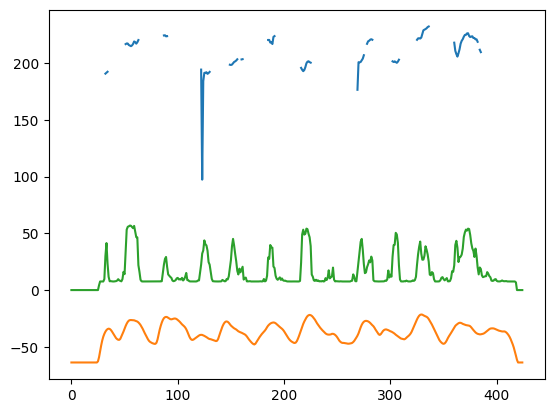

In [29]:
pitch, periodicity, loudness, voicing = pysodic.from_file('charlie_brown_short.mp3')
pitch[~voicing] = torch.nan
print(pitch.shape)
x = range(0, pitch.shape[-1])
plt.plot(x, pitch.squeeze(dim=0))
plt.plot(x, loudness.squeeze(dim=0))
plt.plot(x, 100*periodicity.squeeze(dim=0))
plt.show()

In [35]:
# Create original ppg file
model = 'mel-ppg'
ppg_file = Path(audio_file.parent / f'{audio_file.stem}-{model}.pt')
print(ppg_file)

command = 'python -m ppgs '
command += f'--sources {audio_file} '
command += f'--sinks {ppg_file} '
command += f'--config {ppgs_config_dir / (model + ".py")} '
command += f'--gpu 0'

print(command)

os.system(command)

ppg = torch.load(ppg_file)

charlie_brown_short-mel-ppg.pt
python -m ppgs --sources charlie_brown_short.mp3 --sinks charlie_brown_short-mel-ppg.pt --config /repos/promonet/config/ppgs-experiments/ppgs/mel-ppg.py --gpu 0
preparing dataset metadata (operation may be slow)


processing mel for dataset <list of files>: 100%|█| 1/1 [00:01<00:00,  1.62s/it


using transformer model


charlie_brown_short.mp3


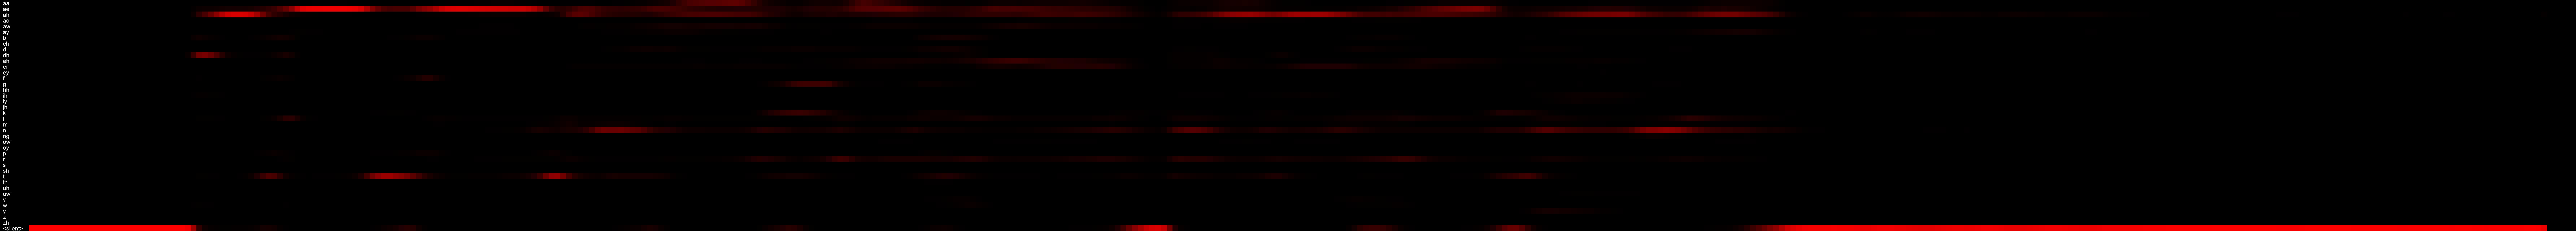

In [38]:
vis_dir = Path('visualizations')
print(audio_file)
with torch.autocast('cuda'):
    ppgs.evaluate.visualize.from_ppg_to_image_file(
        ppg.T,
        audio_file,
        vis_dir / f'fig-{audio_file}.jpg',
        font_filename='arial.ttf',
    )
    # ppgs.evaluate.visualize.from_ppg_to_image_file(reconstruction_inferred_ppg.T, audio_file, 'fig00.jpg', second_ppg=ppg[:, :-1].T, font_filename='arial.ttf')
ipd.display(ipd.Image(vis_dir / f'fig-{audio_file}.jpg'))

In [34]:
audio_file = Path('charlie_brown_short.mp3')
model = 'mel-ppg'
ipd.display(ipd.Audio(audio_file))
monophonize(audio_file)
output_file = audio_file.stem + '-reconstruction.wav'
command = 'python -m promonet '
command += '--audio_files ' + str(audio_file) + ' '
command += '--output_files ' + str(output_file) + ' '
# command += '--pitch_files ' + str(pitch_file) + ' '
# command += f'--speaker_ids {16} '
command += f'--speaker_ids {13} '
# command += f'--speaker_ids {0} '
command += f'--config {ppgs_config_dir / (model + ".py")} {promonet_config_dir / (model + ".py")} '
command += f'--checkpoint /repos/promonet/runs/{model}/generator-00250000.pt '
command += f'--gpu 0'
print(command)
os.system(command)
ipd.Audio(output_file)

python -m promonet --audio_files charlie_brown_short.mp3 --output_files charlie_brown_short-reconstruction.wav --speaker_ids 13 --config /repos/promonet/config/ppgs-experiments/ppgs/mel-ppg.py /repos/promonet/config/ppgs-experiments/promonet/mel-ppg.py --checkpoint /repos/promonet/runs/mel-ppg/generator-00250000.pt --gpu 0
using transformer model


In [7]:
audio_file = Path('doodlebob.mp3')
ipd.display(ipd.Audio(audio_file))
monophonize(audio_file)
output_file = audio_file.stem + '-reconstruction.wav'
command = 'python -m promonet '
command += '--audio_files ' + str(audio_file) + ' '
command += '--output_files ' + str(output_file) + ' '
# command += '--pitch_files ' + str(pitch_file) + ' '
command += f'--speaker_ids {13} '
# command += f'--speaker_ids {0} '
command += f'--config {ppgs_config_dir / (model + ".py")} {promonet_config_dir / (model + ".py")} '
command += f'--checkpoint /repos/promonet/runs/{model}/generator-00800000.pt '
command += f'--gpu 0'
print(command)
os.system(command)
ipd.Audio(output_file)

python -m promonet --audio_files doodlebob.mp3 --output_files doodlebob-reconstruction.wav --speaker_ids 13 --config /repos/promonet/config/ppgs-experiments/ppgs/w2v2fb-ppg.py /repos/promonet/config/ppgs-experiments/promonet/w2v2fb-ppg.py --checkpoint /repos/promonet/runs/w2v2fb-ppg/generator-00800000.pt --gpu 0
using transformer model


In [47]:
# audio_file = Path('fresh_prince.wav')
audio_file = Path('moon.mp3')
model = 'w2v2fb-ppg'
audio, sr = torchaudio.load(audio_file)
audio = audio[..., :sr*8]
short_file = audio_file.stem + '-short.wav'
torchaudio.save(short_file, audio, sr)
ipd.display(ipd.Audio(short_file))
monophonize(audio_file)
output_file = audio_file.stem + '-reconstruction.wav'
command = 'python -m promonet '
command += '--audio_files ' + str(short_file) + ' '
command += '--output_files ' + str(output_file) + ' '
# command += '--pitch_files ' + str(pitch_file) + ' '
command += f'--speaker_ids {83} '
# command += f'--speaker_ids {37} '
# command += f'--speaker_ids {0} '
command += f'--config {ppgs_config_dir / (model + ".py")} {promonet_config_dir / (model + ".py")} '
command += f'--checkpoint /repos/promonet/runs/{model}/generator-00800000.pt '
command += f'--gpu 0'
print(command)
os.system(command)
ipd.Audio(output_file)

python -m promonet --audio_files moon-short.wav --output_files moon-reconstruction.wav --speaker_ids 83 --config /repos/promonet/config/ppgs-experiments/ppgs/w2v2fb-ppg.py /repos/promonet/config/ppgs-experiments/promonet/w2v2fb-ppg.py --checkpoint /repos/promonet/runs/w2v2fb-ppg/generator-00800000.pt --gpu 0
using transformer model


torch.Size([1, 800])


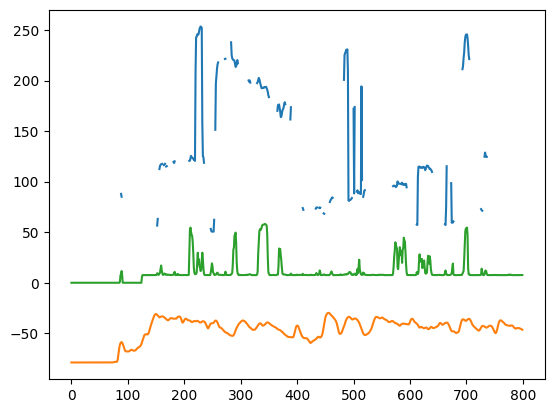

In [59]:
pitch, periodicity, loudness, voicing = pysodic.from_file('moon-short.wav', voicing_threshold=0.08)
pitch[~voicing] = torch.nan
print(pitch.shape)
x = range(0, pitch.shape[-1])
plt.plot(x, pitch.squeeze(dim=0))
plt.plot(x, loudness.squeeze(dim=0))
plt.plot(x, 100*periodicity.squeeze(dim=0))
plt.show()